In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [7]:
df = pd.read_excel("data/laporan_iklim_harian.xlsx", parse_dates=["Tanggal"])
df.head()

,NamaStasiun,WMOID,Tanggal,SuhuMinimum(°C),SuhuMaksimum(°C),SuhuRata-rata(°C),KelembabanRata-rata(%),CurahHujan(mm),LamaPenyinaran(jam),Kecepata AnginRata-rata(knot),ArahAnginTerbanyak(deg),KecepatanAnginTerbesar(knot),ArahAnginSaatKecepatanMaksimum(deg)
0,Stasiun Meteorologi Sultan Mahmud Badaruddin II,96221,2014-01-01,24.2,28.4,26.3,89,1.3,0.6,8,NW,8,315
1,Stasiun Meteorologi Sultan Mahmud Badaruddin II,96221,2014-01-02,24.1,30.4,26.6,88,0.0,1.8,8,N,8,315
2,Stasiun Meteorologi Sultan Mahmud Badaruddin II,96221,2014-01-03,23.3,30.6,26.5,88,1.2,1.0,7,NW,7,315
3,Stasiun Meteorologi Sultan Mahmud Badaruddin II,96221,2014-01-04,23.0,31.4,26.9,85,1.8,0.0,8,NW,8,270
4,Stasiun Meteorologi Sultan Mahmud Badaruddin II,96221,2014-01-05,23.0,31.0,26.2,84,3.1,1.2,8,NW,8,315


In [8]:
df.drop(['NamaStasiun ', 'WMOID', 'SuhuMinimum(°C)', 'SuhuMaksimum(°C)', 'ArahAnginSaatKecepatanMaksimum(deg)'], axis=1, inplace=True)

In [9]:
df.head()

,Tanggal,SuhuRata-rata(°C),KelembabanRata-rata(%),CurahHujan(mm),LamaPenyinaran(jam),Kecepata AnginRata-rata(knot),ArahAnginTerbanyak(deg),KecepatanAnginTerbesar(knot)
0,2014-01-01,26.3,89,1.3,0.6,8,NW,8
1,2014-01-02,26.6,88,0.0,1.8,8,N,8
2,2014-01-03,26.5,88,1.2,1.0,7,NW,7
3,2014-01-04,26.9,85,1.8,0.0,8,NW,8
4,2014-01-05,26.2,84,3.1,1.2,8,NW,8


In [10]:
tanggal = df.Tanggal.dt

In [11]:
df["bulan"] = tanggal.month

In [12]:
df.head()

,Tanggal,SuhuRata-rata(°C),KelembabanRata-rata(%),CurahHujan(mm),LamaPenyinaran(jam),Kecepata AnginRata-rata(knot),ArahAnginTerbanyak(deg),KecepatanAnginTerbesar(knot),bulan
0,2014-01-01,26.3,89,1.3,0.6,8,NW,8,1
1,2014-01-02,26.6,88,0.0,1.8,8,N,8,1
2,2014-01-03,26.5,88,1.2,1.0,7,NW,7,1
3,2014-01-04,26.9,85,1.8,0.0,8,NW,8,1
4,2014-01-05,26.2,84,3.1,1.2,8,NW,8,1


In [13]:
df.bulan.value_counts()

5     132
1     124
3     124
4     120
2     113
6     101
7      93
8      93
10     93
12     93
9      90
11     90
Name: bulan, dtype: int64

In [14]:
df.drop(['Tanggal'], axis=1, inplace=True)

In [15]:
df.head()

,SuhuRata-rata(°C),KelembabanRata-rata(%),CurahHujan(mm),LamaPenyinaran(jam),Kecepata AnginRata-rata(knot),ArahAnginTerbanyak(deg),KecepatanAnginTerbesar(knot),bulan
0,26.3,89,1.3,0.6,8,NW,8,1
1,26.6,88,0.0,1.8,8,N,8,1
2,26.5,88,1.2,1.0,7,NW,7,1
3,26.9,85,1.8,0.0,8,NW,8,1
4,26.2,84,3.1,1.2,8,NW,8,1


In [16]:
X = df.drop(columns=["CurahHujan(mm)"])
y = df["CurahHujan(mm)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1012, 7), (254, 7), (1012,), (254,))

In [17]:
df.columns

Index(['SuhuRata-rata(°C)', 'KelembabanRata-rata(%)', 'CurahHujan(mm)',
       'LamaPenyinaran(jam)', 'Kecepata AnginRata-rata(knot)',
       'ArahAnginTerbanyak(deg)', 'KecepatanAnginTerbesar(knot)', 'bulan'],
      dtype='object')

In [19]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['SuhuRata-rata(°C)', 'KelembabanRata-rata(%)',
      'LamaPenyinaran(jam)', 'Kecepata AnginRata-rata(knot)',
      'KecepatanAnginTerbesar(knot)']),
    ('categoric', cat_pipe(encoder='onehot'), ['ArahAnginTerbanyak(deg)', 'bulan']),
])

from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.linreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
{'algo__fit_intercept': True}
0.0631066510872027 0.026495548085785286 0.03136517710862641


C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


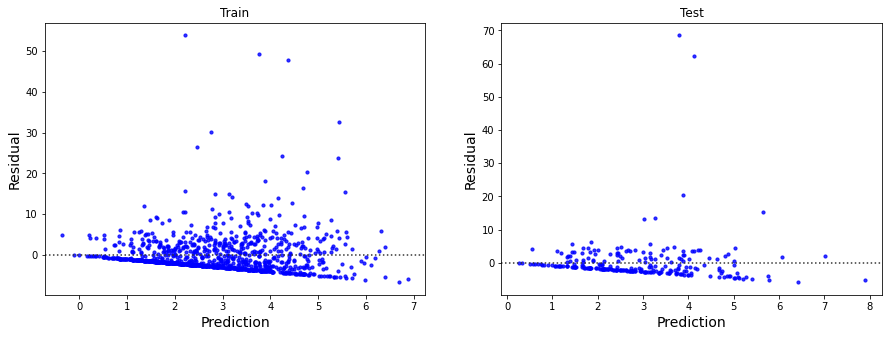

In [20]:
from jcopml.plot import plot_actual_vs_prediction, plot_residual
plot_residual(X_train, y_train, X_test, y_test, model)

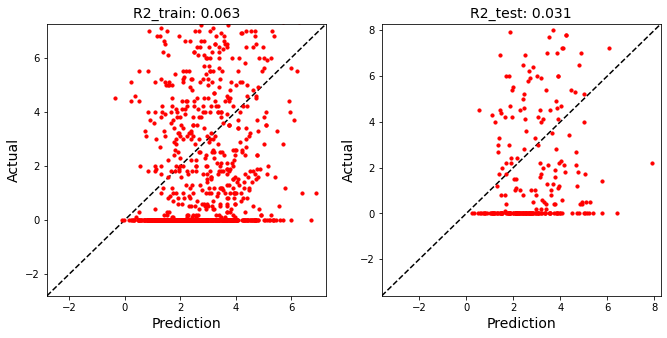

In [21]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)

In [28]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(poly=2, transform="yeo-johnson", scaling="minmax"), ['SuhuRata-rata(°C)', 'KelembabanRata-rata(%)',
      'LamaPenyinaran(jam)', 'Kecepata AnginRata-rata(knot)',
      'KecepatanAnginTerbesar(knot)']),
    ('categoric', cat_pipe(encoder='onehot'), ['ArahAnginTerbanyak(deg)', 'bulan']),
])

from sklearn.linear_model import LinearRegression
pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

model = GridSearchCV(pipeline, gsp.linreg_poly_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\jcopml\pipeline\_pipeline.py:65: UserWarning: Transformer has default standardization, so the scaling argument is neglected
  warn("Transformer has default standardization, so the scaling argument is neglected")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'algo__fit_intercept': True, 'prep__numeric__poly__degree': 1, 'prep__numeric__poly__interaction_only': True}
0.06765415293902255 0.02743461170397928 0.03982602426681214


C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Toko Ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


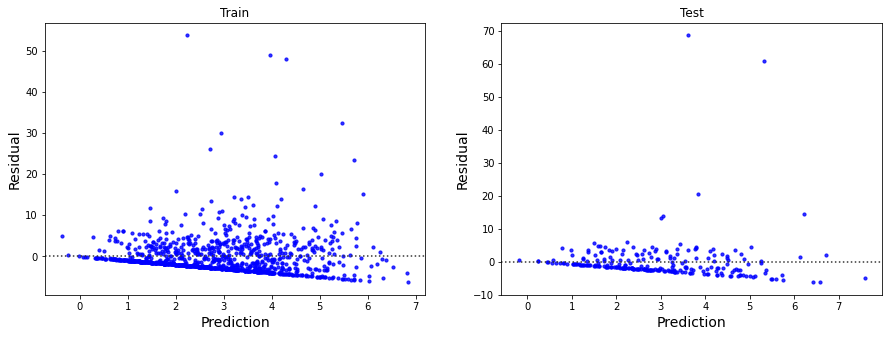

In [29]:
plot_residual(X_train, y_train, X_test, y_test, model)

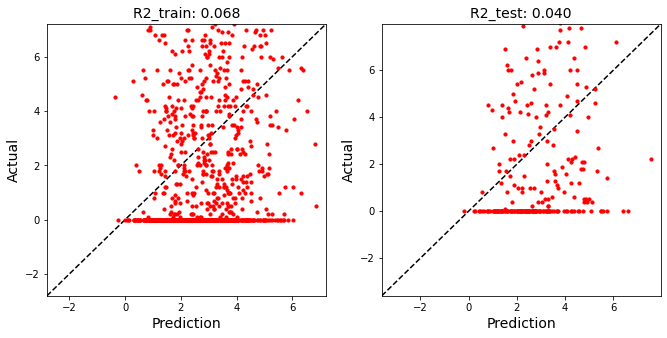

In [30]:
plot_actual_vs_prediction(X_train, y_train, X_test, y_test, model)

In [33]:
df["CurahHujan(mm)"].value_counts()

0.0     573
1.0      23
4.0      18
1.8      17
0.2      16
       ... 
66.0      1
7.7       1
72.0      1
13.0      1
29.2      1
Name: CurahHujan(mm), Length: 149, dtype: int64